# Periodic Crystal Example

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

from qmsolver.System1D import System1D

In [2]:
%matplotlib widget

In [3]:
NUM = 1000
WIDTH = 10

In [4]:
# create potential
v = np.clip(-1/np.abs(np.linspace(-WIDTH/2, WIDTH/2, NUM)), -1000, 0)

#V = np.where((np.arange(NUM)) % 25 < 10, NUM/(WIDTH), 0)
V = np.sum([np.roll(v, 100*o) for o in range(10)], axis=0)

# create system
s = System1D(potential=V, width=WIDTH, num=NUM)

# add the translation operator to the system
s.add_operator('T', np.roll(np.eye(NUM), shift=100, axis=1))

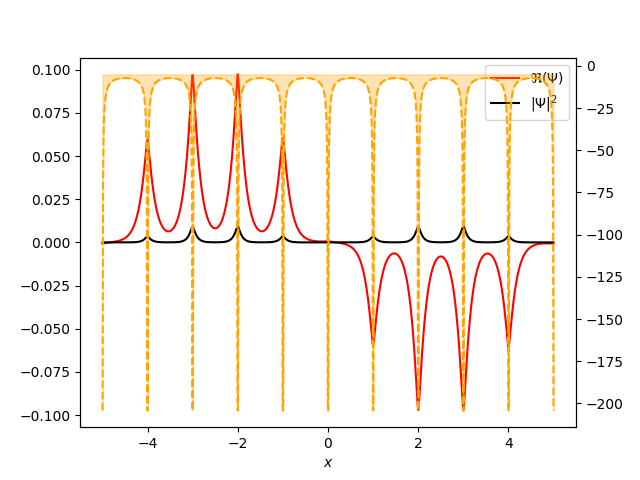

In [5]:
# plot eigenvectors
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
s.plot_potential(ax=ax2)
s.plot_eigenvector('x', 'H', 1, which=('r', 'm'), ax=ax1)

36.89613506592523 36.8961350659282


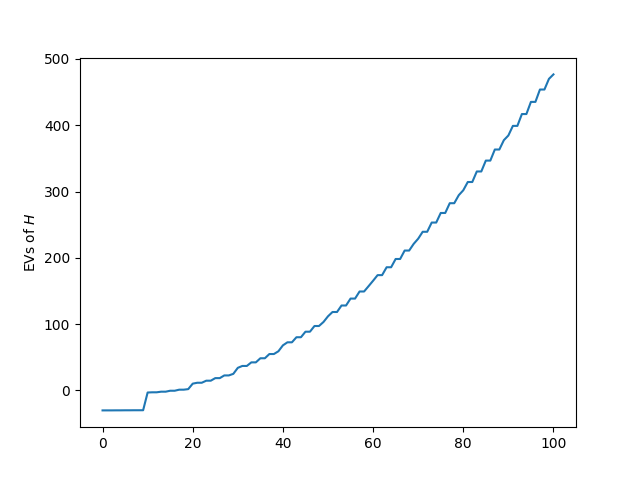

In [6]:
# plot energies
fig, ax = plt.subplots()
s.plot_eigenvalues('H', eigval_range=(0, 100), ax=ax)

# print energies of states that should have the same energy --> estimate the number of decimals needed
print(s.eigenvalues('H')[31], s.eigenvalues('H')[32])

In [7]:
# find a common basis of the hamiltonian and the translation operator
s.find_basis('H', 'T', decimals=7)

d:\repos\QM-solver\venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\repos\QM-solver\venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


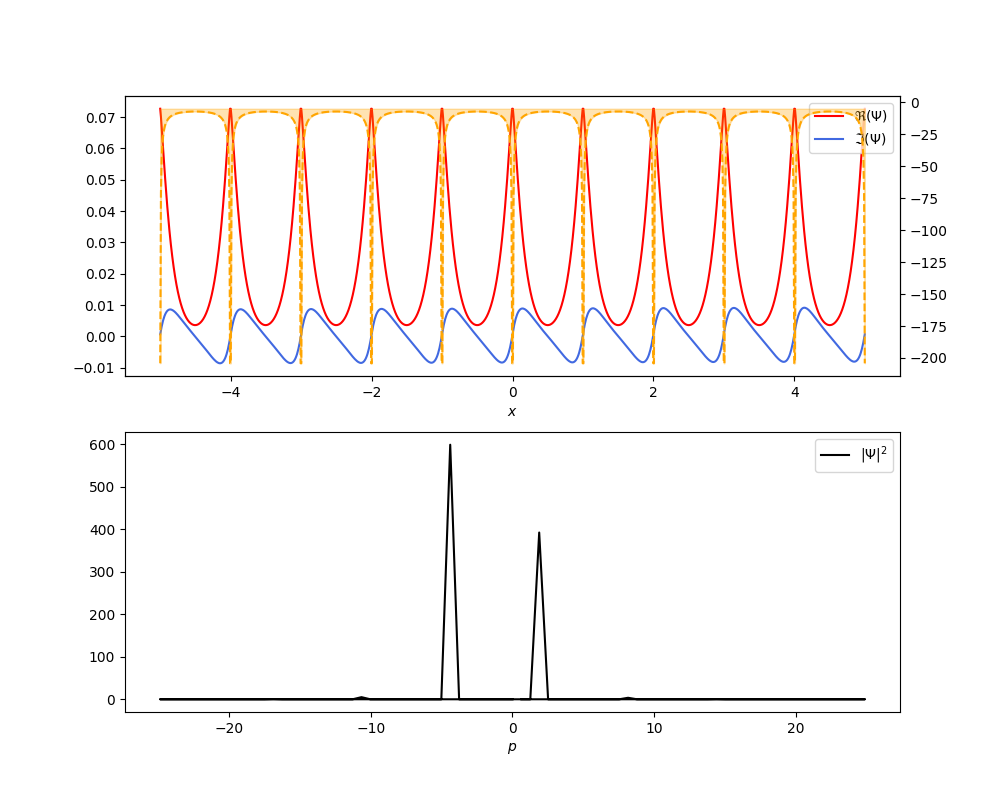

In [10]:
# extract crystal momentum
q = np.angle(s.eigenvalues_basis('T'))

# create u_nq states (Bloch theorem: psi(x) = exp(i*q*x)*u_nq(x))
u = s.basis()[6] * np.exp(-1.0j*q[6]*np.diagonal(s.op('x')))

# choose a state of the common basis
psi = s.basis()[14]

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(10, 8))
ax2 = ax1.twinx()

s.plot_potential(ax=ax2)
s.plot_state(u, 'x', which=('r, i'), plot_type='line', ax=ax1)
s.plot_state(psi, 'p', which=('m'), plot_type='line', eigval_range=(-25, 25), ax=ax3)
ax3.vlines((q[4]), ymin=0, ymax=0.5, color='red')

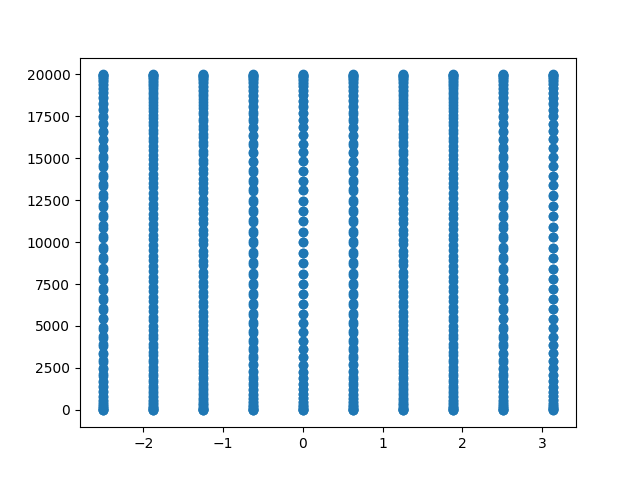

In [9]:
fig, ax = plt.subplots()

ax.scatter(np.angle(s.eigenvalues_basis('T')), s.eigenvalues_basis('H'))